# Home Credit Risk Modeling 

## Table of Contents
## 1. [Introduction](#Introduction)
## 2. [Business Problem](#BP)
## 3. [Data Preparation](#DP)
## 4. [Data Modeling](#DM)
## 5. [Result](#Result)
## 6. [Conclusion](#C)



# Introduction<a id="Introduction"></a>

The project focuses on the "House Credit Default Risk" Kaggle competition, where data is provided by Home Credit, a service dedicated to provided lines of credit (loans) to the those who had traditional banking methods. Predicting whether or not a client will repay a loan or have difficulty is a critical business need, and Home Credit is hosting this competition on Kaggle to see what sort of models the machine learning community can develop to help them in this task

# Business Problem <a id="BP"></a>

Our aim is to optimize Home Credit's impact by enhancing data analysis practices and utilizing advanced algorithms to effectively identify individuals with a high likelihood of loan repayment. This approach strives to minimize unreasonable loan denials, enhance the precision of loan rejections, and provide credit to deserving applicants. Through the incorporation of advanced analytics, this project aims to provide a highly accurate predictive model. It will utilize a range of statistical and machine learning methods to ensure accurate loan repayment predictions.

## Loading the Packages

In [22]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

## Importing data

In [23]:
#reading the csv files 
app_train = pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')
b_balanced = pd.read_csv('bureau_balance.csv')
bureau = pd.read_csv('bureau.csv')
cc_balance = pd.read_csv('credit_card_balance.csv')
pos_cash = pd.read_csv('POS_CASH_balance.csv')
prev_app = pd.read_csv('previous_application.csv')
installments_payments = pd.read_csv('installments_payments.csv')

## Exploring the Data

In [24]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
b_balanced.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [27]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [28]:
cc_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [29]:
pos_cash.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [30]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


Data description

The major dataset used in the analysis are application_train.csv. It provides information regarding every loan application at Home Credit, including client personal information and loan characteristics, in the train dataset. Important factors include loan annuity, income, credit amount, TARGET (loan repayment difficulty), and `SK_ID_CURR} (applicant ID) looks like the main variable after just skewing the data.

# Data Preparation <a id="DP"></a>

#### Handlings of NA and variable transformation

### Exploring the Target Variable

In [32]:
#calculating the number of the TARGET variables that are 0 or 1 using value_counts()
majority = app_train['TARGET'].value_counts()
majority_count = pd.DataFrame({'Labels': majority.index,
                               'Values': majority.values})
majority_count.set_index('Labels', inplace = True)
majority_count

,Values
Labels,
0,282686
1,24825


### Plotting the majority class classifier

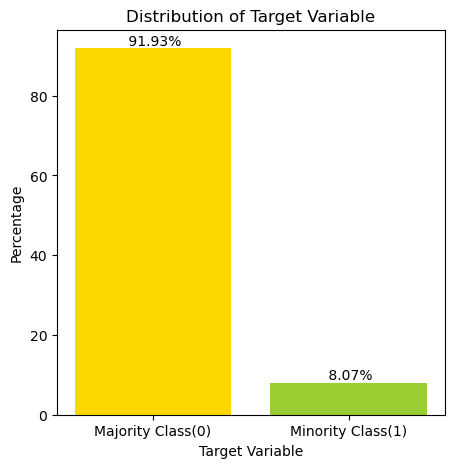

In [33]:
#calculating the percentage of 0 and 1 in TARGET
total = majority_count['Values'].sum()
percentage = majority_count['Values'] / total * 100

#storing the index as labels
labels = majority_count.index

#plotting the Distribution of the TARGET variable
plt.figure(figsize = (5,5))
bars = plt.bar(labels, percentage, color = ['gold', 'yellowgreen'])
plt.xlabel('Target Variable')
plt.ylabel('Percentage')
plt.xticks(labels,['Majority Class(0)', 'Minority Class(1)'])

#to print the data labels on top of the bars
for bar, percent in zip(bars, percentage):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{percent: .2f}%', ha = 'center', va = 'bottom')

plt.title('Distribution of Target Variable')
plt.show()

The majority class (0) with 91.93% states that the number of no defaulter are higher than defaulter (1) with 8.07%.

### Distribution of Occupation Type

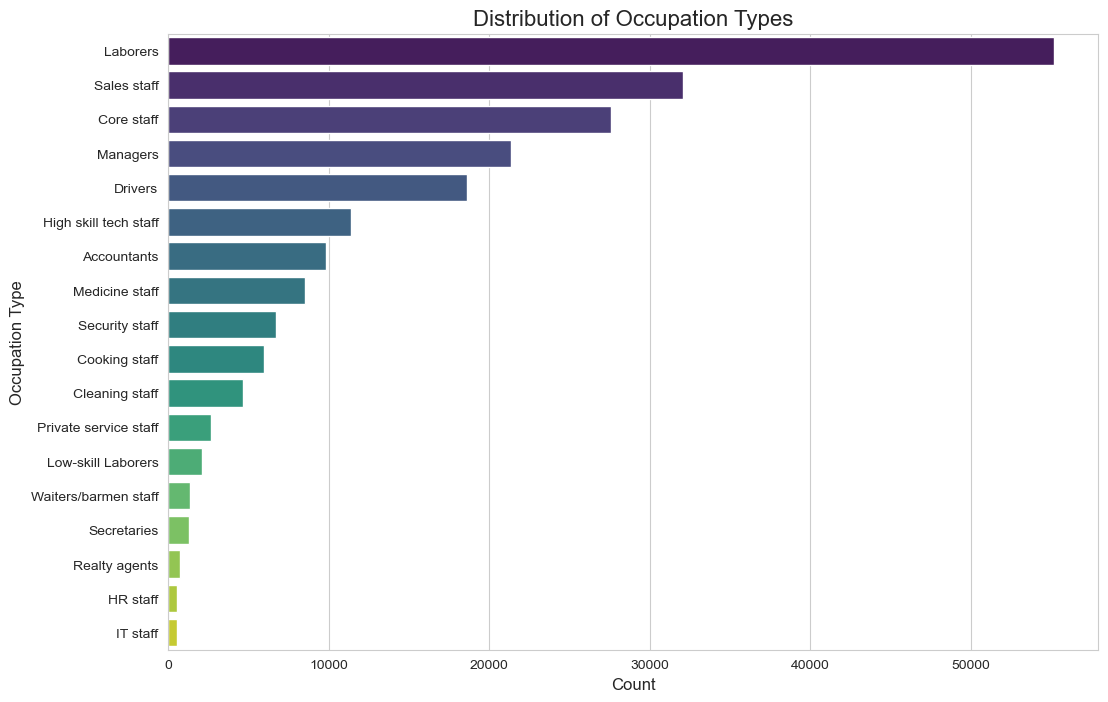

In [39]:
plt.figure(figsize=(12, 8))
sns.countplot(y='OCCUPATION_TYPE', data=app_train, order=app_train['OCCUPATION_TYPE'].value_counts().index, palette='viridis')
plt.title('Distribution of Occupation Types', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Occupation Type', fontsize=12)
sns.set_style("whitegrid")
plt.show()

### Distribution of Loan Amounts

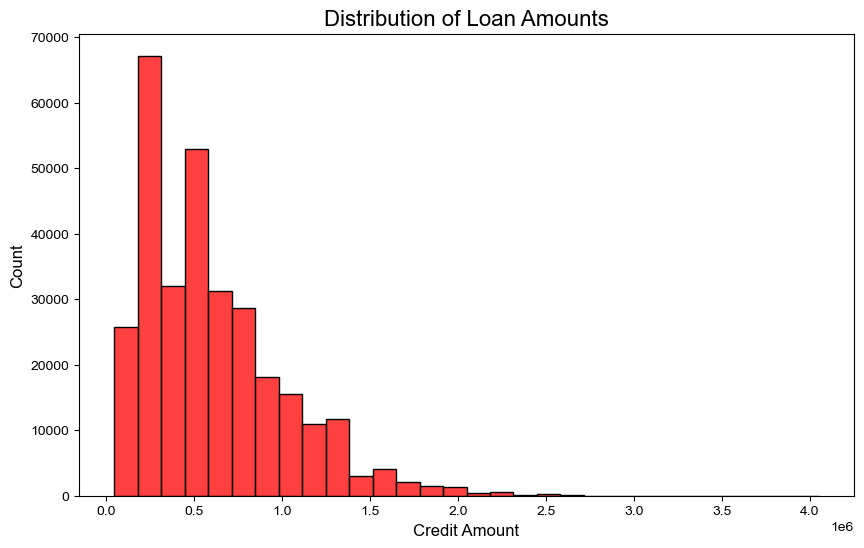

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(app_train['AMT_CREDIT'], bins=30, color='red', kde=False, edgecolor='black')
plt.title('Distribution of Loan Amounts', fontsize=16)
plt.xlabel('Credit Amount', fontsize=12)
plt.ylabel('Count', fontsize=12)
sns.set_style("whitegrid") 
plt.show()

### Distribution of AMT_ANNUITY

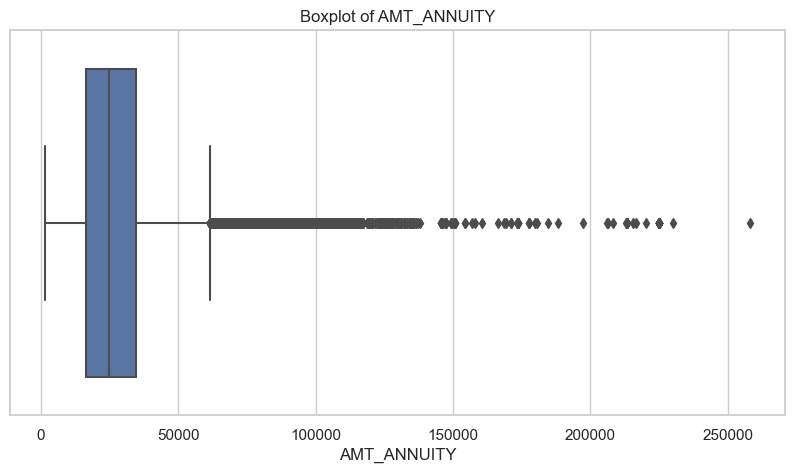

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
plt.title("Boxplot of AMT_ANNUITY")
sns.boxplot(x=app_train["AMT_ANNUITY"])
plt.xlabel('AMT_ANNUITY')
plt.show()

The dataset contains a vast range of information, with some columns fully populated and others having a significant number of missing entries. However, it is crucial that we tackle the concerns regarding missing values and outliers in multiple columns to improve the accuracy and dependability of our predictive model.


### Correlation Between Numeric Columns

In [43]:
numeric = app_train.select_dtypes(include = [np.number]).columns
correlations = app_train[numeric].corr()['TARGET'].sort_values()
print("Most positive correlations:\n", correlations.tail(10))
print("Most negative correlations:\n", correlations.head(10))

Most positive correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
Most negative correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


The output suggests that certain variables, like DAYS_BIRTH, REGION_RATING_CLIENT_W_CITY, and different FLAG_DOCUMENT and REG_CITY features, exhibit a positive correlation with the target. It appears that certain factors, such as age, regional client ratings, and specific document flags, may be linked to a higher likelihood of default. In contrast, features such as EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, and DAYS_EMPLOYED show significant negative correlations. This suggests that higher external source ratings and longer employment durations are associated with a reduced likelihood of loan default.

## Data Cleaning <a id="DC"></a>

### Looking into the missing Data

In [44]:
#counting the missing values and listing its percentage
app_train_copy = app_train.copy()
app_test_copy = app_test.copy()

missing_count = app_train_copy.isnull().sum()
missing_percentage = round((app_train_copy.isnull().mean() * 100), 2)

#creating a dataframe to store the same
missing_table = pd.DataFrame({'Missing Values': missing_count, 'Percentage': missing_percentage})
missing_table = missing_table.sort_values('Missing Values', ascending = False)

#printing the head of the missing table
print(missing_table.head(60))

                              Missing Values  Percentage
COMMONAREA_MEDI                       214865       69.87
COMMONAREA_AVG                        214865       69.87
COMMONAREA_MODE                       214865       69.87
NONLIVINGAPARTMENTS_MODE              213514       69.43
NONLIVINGAPARTMENTS_AVG               213514       69.43
NONLIVINGAPARTMENTS_MEDI              213514       69.43
FONDKAPREMONT_MODE                    210295       68.39
LIVINGAPARTMENTS_MODE                 210199       68.35
LIVINGAPARTMENTS_AVG                  210199       68.35
LIVINGAPARTMENTS_MEDI                 210199       68.35
FLOORSMIN_AVG                         208642       67.85
FLOORSMIN_MODE                        208642       67.85
FLOORSMIN_MEDI                        208642       67.85
YEARS_BUILD_MEDI                      204488       66.50
YEARS_BUILD_MODE                      204488       66.50
YEARS_BUILD_AVG                       204488       66.50
OWN_CAR_AGE                    

In [45]:
#dropping the columns with more than 50% missing values except for 'OWN_CAR_AGE'
columns_drop = missing_percentage[missing_percentage > 50].index
columns_drop = [col for col in columns_drop if col != 'OWN_CAR_AGE']
app_train_copy = app_train_copy.drop(columns=columns_drop)
app_test_copy = app_test_copy.drop(columns=columns_drop)

### Imputing the missing data

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#seprating the numeric and categorical columns
numeric_col = app_train_copy.select_dtypes(include = 'number').columns
categorical_col = app_train_copy.select_dtypes(include='object').columns

numeric_col_test = app_test_copy.select_dtypes(include = 'number').columns
categorical_col_test = app_test_copy.select_dtypes(include='object').columns

#defining a pipeline for numeric columns
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median'))])

#defining a pipeline for categorical columns
cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'most_frequent'))])

#applying the pipeline to impute the missing values
app_train_copy[numeric_col] = num_pipeline.fit_transform(app_train_copy[numeric_col])
app_train_copy[categorical_col] = cat_pipeline.fit_transform(app_train_copy[categorical_col])

app_test_copy[numeric_col_test] = num_pipeline.fit_transform(app_test_copy[numeric_col_test])
app_test_copy[categorical_col_test] = cat_pipeline.fit_transform(app_test_copy[categorical_col_test])

### Categorical Variables Encoding

In [47]:
#identifying the categorical columns
categorical_col = app_train_copy.select_dtypes(include=['object']).columns

for col in categorical_col:
    app_train_copy[col] = pd.factorize(app_train_copy[col])[0]
    app_test_copy[col] = pd.factorize(app_test_copy[col])[0]

In [48]:
print(app_test_copy.shape)
print(app_train_copy.shape)

(48744, 81)
(307511, 82)


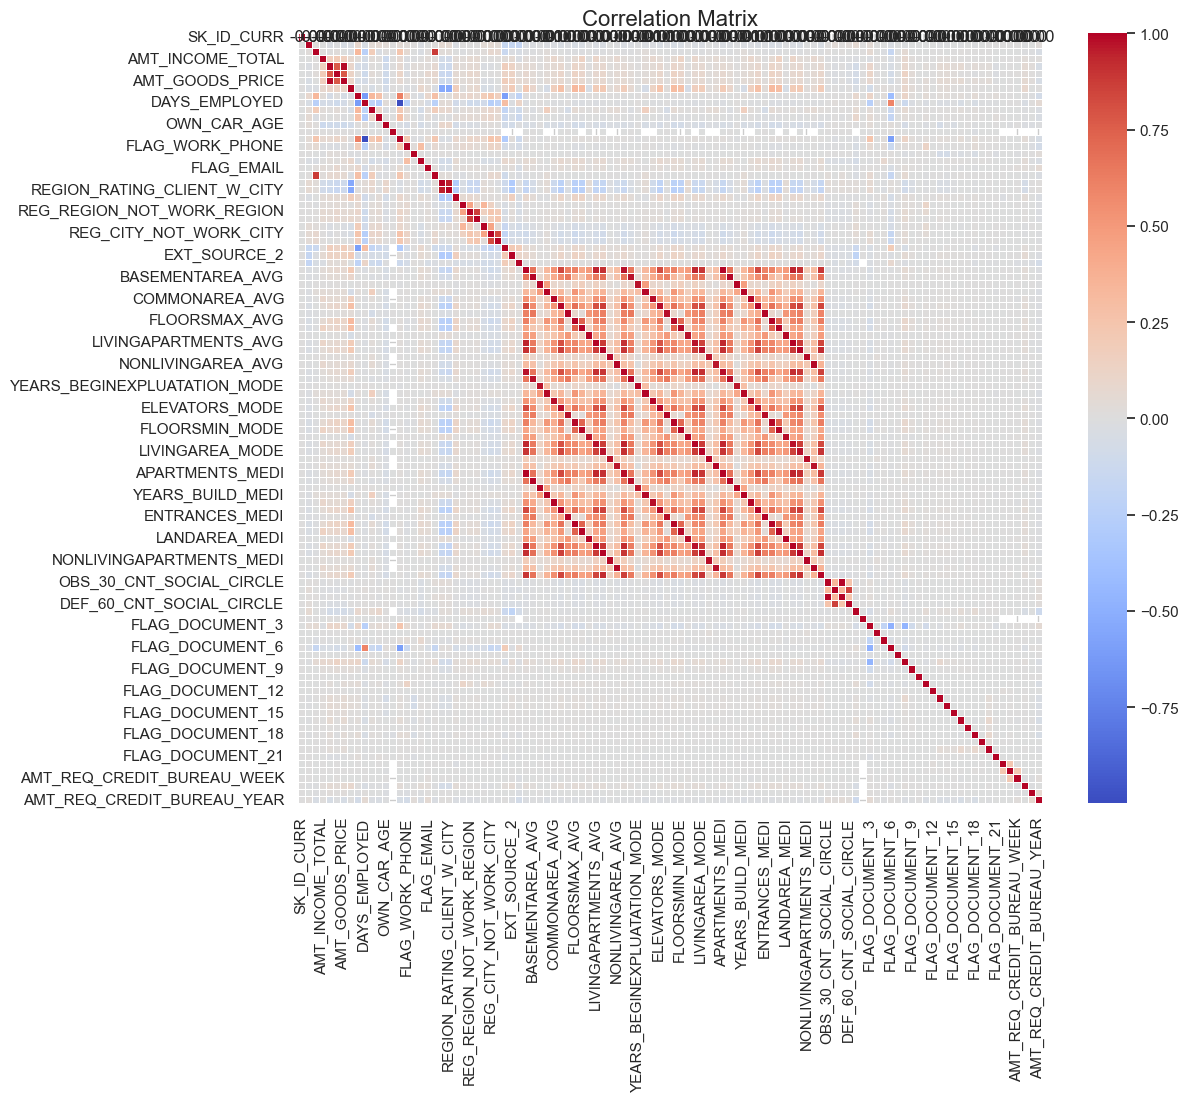

In [52]:
# Select only numeric columns for correlation matrix
numeric_cols = app_train.select_dtypes(include=[np.number])  # Automatically excludes non-numeric columns
corr = numeric_cols.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

There are several important steps involved in data preprocessing. We have handled the missing data, imputed values, and encoded categorical variables within the app_train_copy and app_test_copy datasets.Firstly, we have computed the percentage of missing values for each column and dropped the columns with over 50% of missing data, except for the 'OWN_CAR_AGE' column.

After dropping with over 50% of missing data, we have applied imputation strategies to fill in missing data. Numeric columns are filled with median values, while categorical columns are filled with the most frequent values.

Finally, it transforms categorical variables into numerical values, ensuring that the datasets are suitable for further analysis and modeling.

## Data Modeling <a id="DM"></a>

### Regression Model without the Normalised data

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

#separating the target variable
X = app_train_copy.drop('TARGET', axis = 1)
Y = app_train_copy.TARGET

#splitting the data into training and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 30, random_state = 0, stratify = Y)

#building the logistic regression model
log_model = LogisticRegression()

#fiiting the model into the train set
log_model.fit(X_train, Y_train)

#predicting the target variable
pred = log_model.predict(X_test)

#evaluating the model performance
acc = accuracy_score(Y_test, pred)
print("Accuracy:", acc)

AR = roc_auc_score(Y_test, log_model.predict_proba(X_test)[:, 1]).round(4)
print("AUC_ROC:", AR)

Accuracy: 0.9333333333333333
AUC_ROC: 0.4286


### Data Nomalization

In [58]:
from sklearn.preprocessing import MinMaxScaler

#loading the pre-processed DataFrame
normalized_train = app_train_copy.copy()

#selecting numeric columns
num_col = normalized_train.select_dtypes(include=['int64', 'float64']).columns

#initializing the MinMaxScaler
scaler = MinMaxScaler()

#normalizing the numeric columns
normalized_train[num_col] = scaler.fit_transform(normalized_train[num_col])

#displaying the first few rows
normalized_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.001512,0.090287,0.090032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04
1,0.000003,0.0,0.0,0.5,0.0,1.0,0.0,0.002089,0.311736,0.132924,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,0.000006,0.0,1.0,0.0,1.0,0.0,0.0,0.000358,0.022472,0.020025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,0.000011,0.0,0.0,0.5,0.0,0.0,0.0,0.000935,0.066837,0.109477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04
4,0.000014,0.0,0.0,0.0,0.0,0.0,0.0,0.000819,0.116854,0.078975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


### Prediction on Test Data

In [62]:
# Ensure SK_ID_CURR is treated as integers
app_test_copy['SK_ID_CURR'] = app_test_copy['SK_ID_CURR'].astype('int32')

# Predicting probabilities rather than class labels
test_prob = log_model.predict_proba(app_test_copy)[:, 1]  # Get the probability of the class being 1

# Submission DataFrame
submission = pd.DataFrame({
    "SK_ID_CURR": app_test_copy["SK_ID_CURR"], 
    "TARGET": test_prob
})

# Removing duplicates from the submission
submission = submission.drop_duplicates(subset="SK_ID_CURR", keep="first")

# Saving the submission DataFrame to a CSV file
submission.to_csv("submission_logreg_trial.csv",index=False)

The Kaggle score for Regression Model without the normalised data is 0.6059

### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

#separating the target variable
X = normalized_train.drop('TARGET', axis=1)
Y = normalized_train['TARGET']

#splitting the data into training and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0, stratify=Y)

#initializing the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=50, verbose=1, n_jobs=-1)

#training the model
rf_model.fit(X_train, Y_train)

#making predictions on the test set
y_pred_rf = rf_model.predict(X_test)

#evaluating the accuracy of the model
rf_acc = accuracy_score(Y_test, y_pred_rf)
print("Accuracy:", rf_acc)

#evaluating the auc_roc of the model
AR = roc_auc_score(Y_test, rf_model.predict_proba(X_test)[:, 1]).round(4)
print("AUC_ROC", AR)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Accuracy: 0.9193964489344636


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s


AUC_ROC 0.709


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.5s finished


The Random Forest model achieved an accuracy of 0.919 and an AUC-ROC score of 0.709 on the validation set, indicating a notable increase in auc_roc compared to the logistic regression model's accuracy of 0.9333 and AUC-ROC of 0.428.

### Prediction on Test Data

In [63]:
# Ensure SK_ID_CURR is treated as integers
app_test_copy['SK_ID_CURR'] = app_test_copy['SK_ID_CURR'].astype('int32')

# Predicting probabilities rather than class labels
test_prob = rf_model.predict_proba(app_test_copy)[:, 1]  # Get the probability of the class being 1

# Submission DataFrame
submission = pd.DataFrame({
    "SK_ID_CURR": app_test_copy["SK_ID_CURR"], 
    "TARGET": test_prob
})

# Removing duplicates from the submission
submission = submission.drop_duplicates(subset="SK_ID_CURR", keep="first")

# Saving the submission DataFrame to a CSV file
submission.to_csv("submission_rf_trial.csv",index=False)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


When evaluated on Kaggle, the Random Forest model scored 0.5498, which is an slightly less than the RFE with logistic regression model's Kaggle score of 0.6059.

### Model comparison

In [64]:
# Define the data
data = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [0.9333, 0.9194],
    "AUC_ROC": [0.4286, 0.7090],
    "Kaggle Score": [0.6059, 0.5498]
}

# Create DataFrame
results_df = pd.DataFrame(data)

# Print the DataFrame
print(results_df)

                 Model  Accuracy  AUC_ROC  Kaggle Score
0  Logistic Regression    0.9333   0.4286        0.6059
1        Random Forest    0.9194   0.7090        0.5498


## Results <a id="Results"></a>

### Model Comparison

**Logistic Regression Models:**

The Logistic Regression model demonstrates remarkable strengths, particularly its impressive accuracy of 93.33%. This accuracy reflects its ability to consistently predict loan repayment outcomes, which is a crucial metric in the lending industry. The accuracy of this model, along with its impressive Kaggle score of 0.6059, demonstrates its ability to perform well on both training and testing data. addition, the simplicity and interpretability of Logistic Regression are major strengths. These features enhance stakeholder comprehension of the decision-making process, promoting trust and simplifying regulatory compliance. Nevertheless, the AUC-ROC of 0.4286 indicates that it may struggle to differentiate between defaulters and non-defaulters when compared to more advanced models. This could be a significant disadvantage in risk-sensitive situations.
<br>

**Random Forest Classifier:**

Random Forest, on the other hand, is highly effective at managing intricate, non-linear connections between features because of its ensemble approach, which incorporates multiple decision trees. This capability is evident in its impressive AUC-ROC score of 0.709, showcasing its exceptional ability to differentiate between potential payers and defaulters. The model's accuracy of 91.94% is slightly lower than that of Logistic Regression, and its Kaggle score of 0.5498 suggests less generalization, its durability in risk assessment could still make it a reasonable choice. In addition, Random Forest has the ability to automatically handle feature interactions and importance, allowing for the discovery of more detailed insights from intricate datasets.
<br>


## Conclusion <a id="C"></a>


Given the high stakes involved in financial lending, the choice between Logistic Regression and Random Forest should be guided by both the models' performance metrics and business objectives. The Random Forest model, despite its slightly lower overall accuracy and Kaggle score, might be more appropriate due to its superior capability to discern between potential payers and defaulters, aligning better with Home Credit's core objectives of minimizing risk while increasing financial inclusion.